# <span style="color:#1111AA">Modulation: Optical beat</span>

# Table of Contents

# 1. Overview

## 1.1. Introduction

## 1.2. Prerequisites and reading material

We recommend that you have done the following notebooks before starting this one:
* 01_Introduction
    * 01_Ipython_notebook
        * [01_Ipython_notebook](../../01_Introduction/01_Ipython_notebook/01_Ipython_notebook.ipynb)
    * 02_Finesse
        * [01_Introduction](../../01_Introduction/02_Finesse/01_Introduction.ipynb)
    * 03_Pykat
        * [01_Introduction](../../01_Introduction/03_Pykat/01_Introduction.ipynb)
        * [02_Plotting_Examples](../../01_Introduction/03_Pykat/02_Plotting_Examples.ipynb)

or have corresponding basic experience of Ipython notebooks, PyKat, and Finesse. The links above only works if you started ipython notebook in the top directory of this course.

**Reading material and references:**

[1] [A. Freise, K. Strain, D. Brown, and C. Bond, "Interferometer Techniques for Gravitational-Wave Detection", *Living Reviews in Relativity* **13**, 1 (2010)](http://arxiv.org/pdf/0909.3661v3). - Living review article (more like a book) on laser interferometry in the frequency domain for detecting gravitational waves, and FINESSE.

[2] [A. Freise, D. Brown, and C. Bond, "Finesse, Frequency domain INterferomEter Simulation SoftwarE"](http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf). - FINESSE-manual

[3] [FINESSE syntax reference](http://www.gwoptics.org/finesse/reference/) - Useful online syntax reference for FINESSE. Also available in the Finesse manual [2], but this online version is updated more frequently.

## 1.3. After this session you will...

* Something

# 2. Optical beat

## 2.1. Importing packages

Importing python and PyKat packages that we will need, and setting up how to display figures.

In [2]:
import numpy as np                         # Importing numpy
import matplotlib                          # Importing matplotlib, so we can plot figures
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib inline      
# Initialises the PyKat plotting tool. Change the dpi value to adjust size of figures on your screen.
pykat.init_pykat_plotting(dpi=90)          

                                              ..-
    PyKat 1.0.4           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



# 2.2 What is an optical beat

Optical beat signals are created when the optical field consists of more than one frequency component. Lets look at the simplest case of just two frequency components: at some arbitrary point in space we have an optical field given by

\begin{align}
E(t) = a_c \mathrm{e}^{i\omega_c t} + a_1 \mathrm{e}^{i\omega_1 t}.
\end{align}

Here, the subscript $c$ stands for carrier and the subscript $1$ indicates a sideband. We want to distinguish these as for a gravitational wave detector, the carrier frequency is around 282 THz ($\lambda = 1064$ nm) while an upper sideband frequency preferably can be written as $\omega_1 = \omega_c + \omega_s$, where $\omega_s$ is somewhere between $10\times 2\pi $ rad/s and $10^9$ rad/s. A photo diode can only resolve power fluctuations up to around 100 MHz, thus what we will measure is the power averaged over some period of time. As we use units where the amplitude of the light field is expressed in $\sqrt{\mathrm{W}}$, the power averaged over the period time of the carrier is given by

\begin{align}
\bar{P}(t)= \big|E(t)\big|^2 &= \big|a_c\big|^2 + \big|a_1\big|^2 + a_c a_1^* \mathrm{e}^{-i\omega_s t} + a_c^* a_1 \mathrm{e}^{i\omega_s t} \\
                      &= \big|a_c\big|^2 + \big|a_1\big|^2 + 2\mathcal{Re} \big(a_c^* a_1 \mathrm{e}^{i\omega_s t} \big).
\end{align}

We end up with a DC part, and an AC part of frequency $\omega_s = \big| \omega_c - \omega_1 \big|$. We say that the two frequency components beat against each other to create this **beat signal**. Usually, it is the amplitude, frequency, and phase of the sideband are the information we are intrested in extracting. However, the sideband amplitude is normally tiny compared to the carrier amplitude, so in the DC part it is hard to detect its magnitude. However, the time dependent term is proportional to the sideband amplitude, so if we can separate the DC and AC part somehow (demodulation and low pass filter) we could extract this information. 

## 2.3 Example code visualising an optical beat

In the example below we look at a laser field containing two frequency components, and how the power of this field looks like.

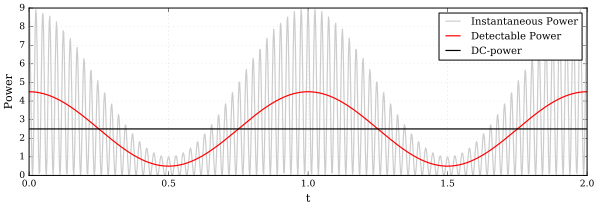

In [25]:
## Code for showing an optical beat ##

# Parameters
# -------------------------------------
# Time array [s]
t = np.linspace(0,2,1000)
# Frequencies [Hz]
f1 = 20
f2 = 21
# Phases
phi1 = 0
phi2 = 0
# Amplitudes
a1 = 2
a2 = 1

# Computing the fields
# -------------------------------------
# The two fields
E1 = a1*np.cos(2*np.pi*f1*t + phi1)
E2 = a2*np.cos(2*np.pi*f2*t + phi2)
# The total field
E = E1+E2
# The total power at the photo diode
P = E**2
# The obtical beat signal
beat = a1*a2*np.cos((f2-f1)*2*np.pi*t)
# DC power
dc = (a1**2 + a2**2)/2

# Plotting
# -------------------------------------
fig = plt.figure(figsize=(10,3))
ax = plt.subplot(111)
ax.plot(t,P,'0.8',label='Instantaneous Power')
ax.plot(t,dc+beat,'r', label='Detectable Power')
ax.plot([t[0],t[-1]],[dc,dc],'k',label='DC-power')
ax.set_xlabel('t')
ax.set_ylabel('Power'
ax.legend(loc=1, fontsize=10)
plt.show(fig)

<font size="2">**Figure.** Here we see the instantaneous power (grey), the beat signal measureable with a photo diode (red), and the DC power (black). To generate the figure, we have used $E(t) = a_c \cos(\omega_c t) + a_1 \cos(\omega_1 t)$, with $a_c = 2~\sqrt{\mathrm{W}}$, $a_1 = 1~\sqrt{\mathrm{W}}$, $f_c = 20$ Hz, and $f_1 = 21$ Hz.</font>

# 2.4. FINESSE model and example

<img src="optical_beat_setup.svg" style="width: 300px;"/>

The model

In [74]:
basekat = finesse.kat()
basekat.verbose = False

code = '''
const freq 10k             # creating a constant for the frequency offset

l laser1 1 0 n1            # laser with P=1W at the default frequency
s s1 1n n1 n2              # space of 1nm length

l laser2 .01 $freq n3      # a second laser with f=10kHz frequency offset
s s2 1n n3 n4              # another space of 1nm length

bs bs1 0.5 0.5 0 0 n2 n5 dump n4   # 50:50 beam splitter
s s3 1n n5 n6                      # another space of 1nm length
'''
basekat.parseKatCode(code)

In [86]:
kat = deepcopy(basekat)

code = '''
## Detectors ##
ad a1 0 n6                        # amplitude detector at f=0Hz
ad a2 $freq n6                    # amplitude detector at f=10kHz
pd dc n6                          # simple photo detector
pd1 ac $freq n6                   # photo detector with demodulation at 10kHz and low pass filter

## Simulation instructions ##
xaxis laser2 phi lin 0 180 100     # changing the phase of the l2-beam
yaxis abs:deg                      # plotting amplitude and phase
'''

# Running the simulation
kat.parseKatCode(code)
out = kat.run()

Plotting results:

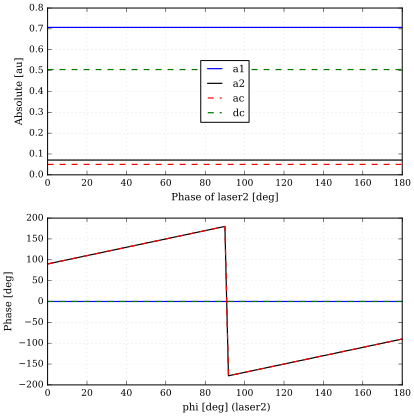

In [90]:
fig = out.plot(styles={'a1':'b-','a2':'k-','dc':'g--','ac':'r--'},xlabel='Phase of laser2 [deg]')

# 3. Tasks

# 4. Tasks with answers

## 4.1. Detecting beat power

In [79]:
kat2 = deepcopy(basekat)

code = '''
## Detectors ##
ad a1 0 n6                        # amplitude detector at f=0Hz
ad a2 $freq n6                    # amplitude detector at f=10kHz
pd dc n6                          # simple photo detector
pd1 ac $freq n6                   # photo detector with demodulation at 10kHz and low pass filter

## Simulation instructions ##
xaxis laser2 P log 1n 0.1 100     # changing the phase of the l2-beam
yaxis log abs                     # plotting amplitude and phase
'''

# Running the simulation
kat2.parseKatCode(code)
out2 = kat2.run()

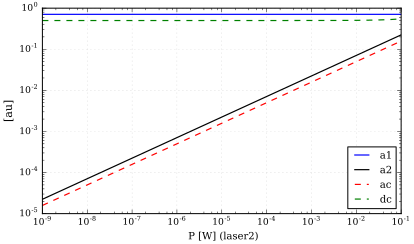

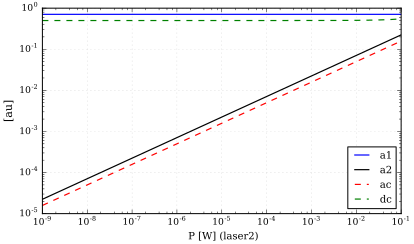

In [81]:
out2.plot(styles={'a1':'b-','a2':'k-','dc':'g--','ac':'r--'})

# Summary

Beat signals shows up in the power of optical fields consisting of two or more frequency components, where the beat frequency is the difference between the frequencies present in the field. The beat signal is an effect of the field being amplitude modulated.